In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [2]:
# Load dataset
df = pd.read_csv(r'/Users/anantsinha/Desktop/DsResearch 3/Banking/banking_data.csv')

# Data Preprocessing
df.dropna(subset=['education', 'marital_status', 'poutcome', 'job', 'duration', 'campaign', 'previous'], inplace=True)
df['marital_status_ordinal'] = df['marital_status'].map({'single': 1, 'married': 2, 'divorced': 3})

def success_rate(poutcome):
    return 1 if poutcome == 'success' else 0

df['success_rate'] = df['poutcome'].apply(success_rate)

# Encoding categorical variables
df['loan_binary'] = df['loan'].map({'yes': 1, 'no': 0})
df['housing_binary'] = df['housing'].map({'yes': 1, 'no': 0})

df['job'] = df['job'].astype('category')
df['education'] = df['education'].astype('category')

# Defining Features and Target
X = df[['age', 'balance', 'marital_status_ordinal', 'loan_binary', 'housing_binary', 'job', 'education', 'duration', 'campaign', 'previous']]
y = df['success_rate']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline
num_features = ['age', 'balance', 'duration', 'campaign', 'previous']
cat_features = ['job', 'education']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# Model Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])



In [3]:
# Training Model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)



Accuracy: 0.9636
Confusion Matrix:
[[8710   29]
 [ 300    3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8739
           1       0.09      0.01      0.02       303

    accuracy                           0.96      9042
   macro avg       0.53      0.50      0.50      9042
weighted avg       0.94      0.96      0.95      9042



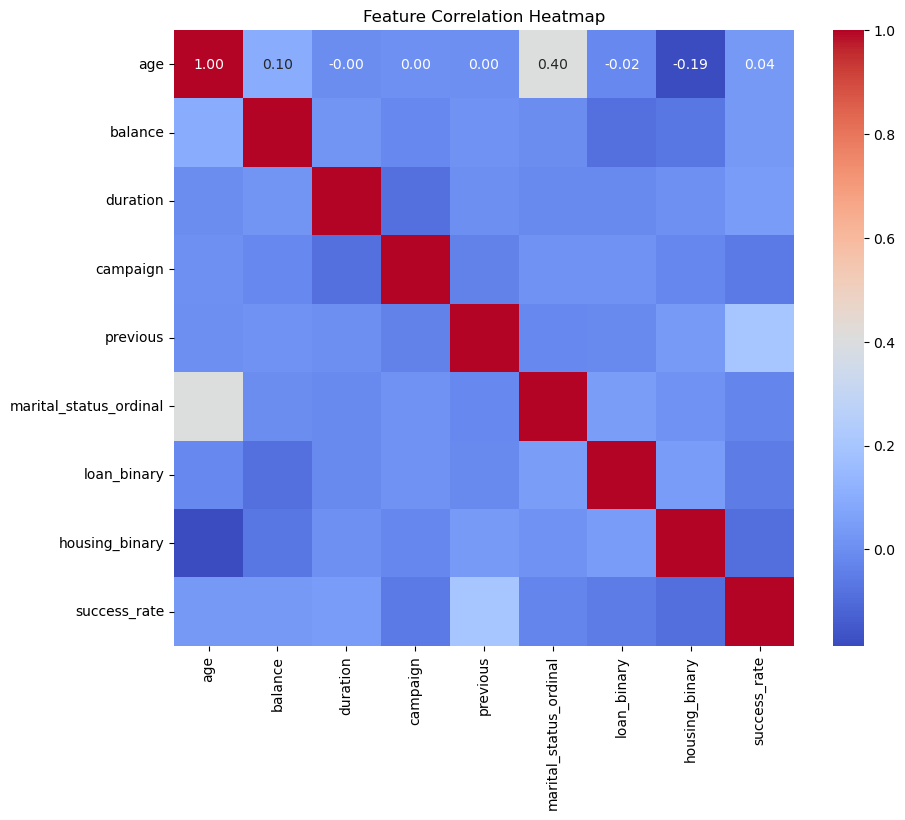

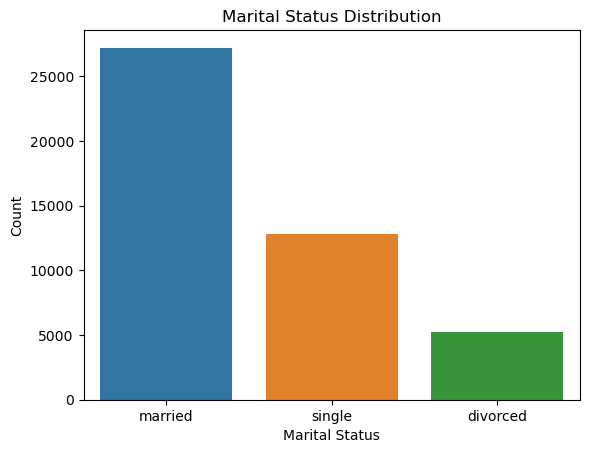

/Users/anantsinha/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


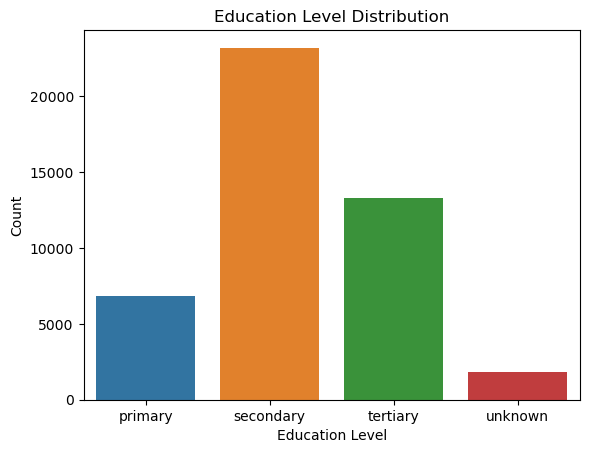

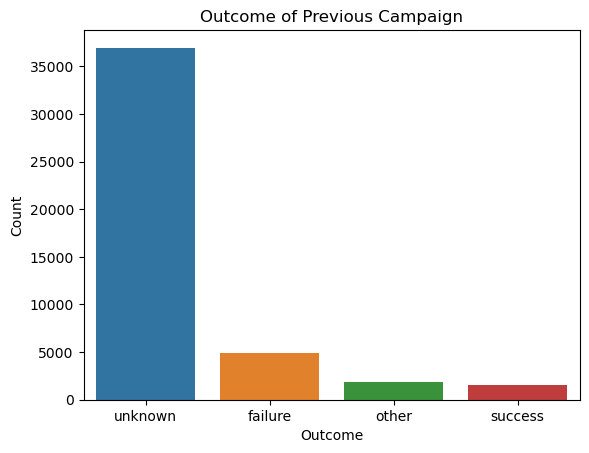

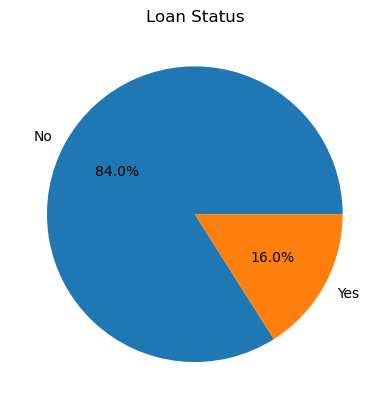

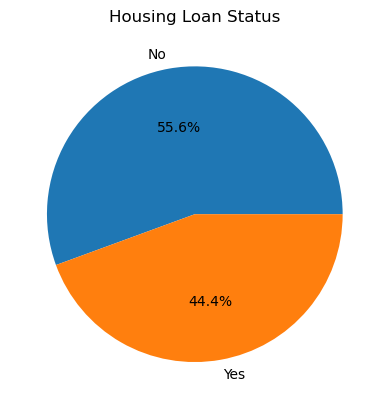

In [4]:
# Data Visualization
plt.figure(figsize=(10,8))
sns.heatmap(df[['age', 'balance', 'duration', 'campaign', 'previous', 'marital_status_ordinal', 'loan_binary', 'housing_binary', 'success_rate']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

sns.countplot(x='marital_status', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

sns.countplot(x='education', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

sns.countplot(x='poutcome', data=df)
plt.title('Outcome of Previous Campaign')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Pie Charts
plt.pie(df['loan'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Loan Status')
plt.show()

plt.pie(df['housing'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Housing Loan Status')
plt.show()
